In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


Credit score Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
train_df = pd.read_csv("../input/credit-score-classification/train.csv")
test_df = pd.read_csv("../input/credit-score-classification/test.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
train_df.shape , test_df.shape

((100000, 28), (50000, 27))

In [7]:
train_df.drop(['ID','Customer_ID','Month','Name','SSN',
               'Type_of_Loan','Credit_History_Age']
               ,axis=1,inplace=True)

In [8]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

<AxesSubplot:>

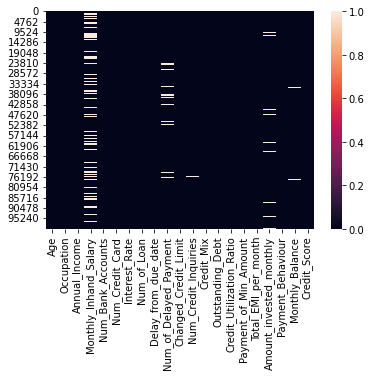

In [10]:
sns.heatmap(train_df.isnull())

In [11]:
train_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
train_df.duplicated().sum()

0

In [13]:
size_before_cleaning = test_df.shape
test_df = test_df[test_df.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - test_df.shape[0]))

772 Records dropped


In [14]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [15]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [16]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [17]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [18]:
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].apply(Amount_invested_monthly)
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].astype("float")

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [20]:
train_df["Changed_Credit_Limit"]=train_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
train_df.drop(train_df[train_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
train_df["Changed_Credit_Limit"]=train_df["Changed_Credit_Limit"].astype("float")

In [21]:
train_df.drop(train_df[train_df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    train_df[i] = train_df[i].apply(filter_general)
    train_df[i] = train_df[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [22]:
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].astype(np.float64)

In [23]:
train_df['Occupation'] = train_df['Occupation'].replace('_______', np.nan)
train_df['Occupation'] = train_df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [24]:
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace('_', np.nan)
train_df['Credit_Mix'] = train_df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [25]:
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace('NM', np.nan)
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [26]:
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].replace('!@9#%8', np.nan)
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [27]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    train_df[i].fillna(train_df[i].median(), inplace=True)

In [28]:
train_df['Monthly_Balance'].fillna(train_df['Monthly_Balance'].median(), inplace=True)

In [29]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,4.0,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,-1,14.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,5,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3091.260833,3,4,3,4.0,8,4.0,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Medium_value_payments,340.479212,Good


In [30]:
train_df.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97900.000000,97900,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900,97900.000000,97900.000000,97900,97900.000000,97900
unique,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Lawyer,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Good,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,13328,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,43593,nan,nan,62968,nan,nan,24959,nan,52076
mean,119.903371,nan,175934.197698,4026.671541,17.075863,22.519642,72.271532,10.741992,21.075117,29.793841,10.465545,27.295996,nan,1426.613476,32.281389,nan,1406.898838,615.227515,nan,401.596439,nan
std,687.221649,nan,1425711.671398,2960.795886,117.173367,129.223810,466.306319,61.565651,14.865503,218.323491,6.670756,190.946896,nan,1155.544499,5.114578,nan,8314.901431,2000.512234,nan,212.535948,nan
min,14.000000,nan,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,0.000000,nan,0.007760,nan
25%,25.000000,nan,19436.305000,1790.959167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,nan,566.080000,28.049067,nan,30.338701,76.949795,nan,270.917679,nan
50%,34.000000,nan,37573.920000,3091.260833,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,nan,1166.370000,32.300332,nan,69.272824,135.799125,nan,336.639979,nan
75%,42.000000,nan,72760.040000,5370.100000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,nan,1946.810000,36.491015,nan,161.487532,254.905860,nan,467.378940,nan


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>],
       [<AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Monthly_Balance'}>]], dtype=object)

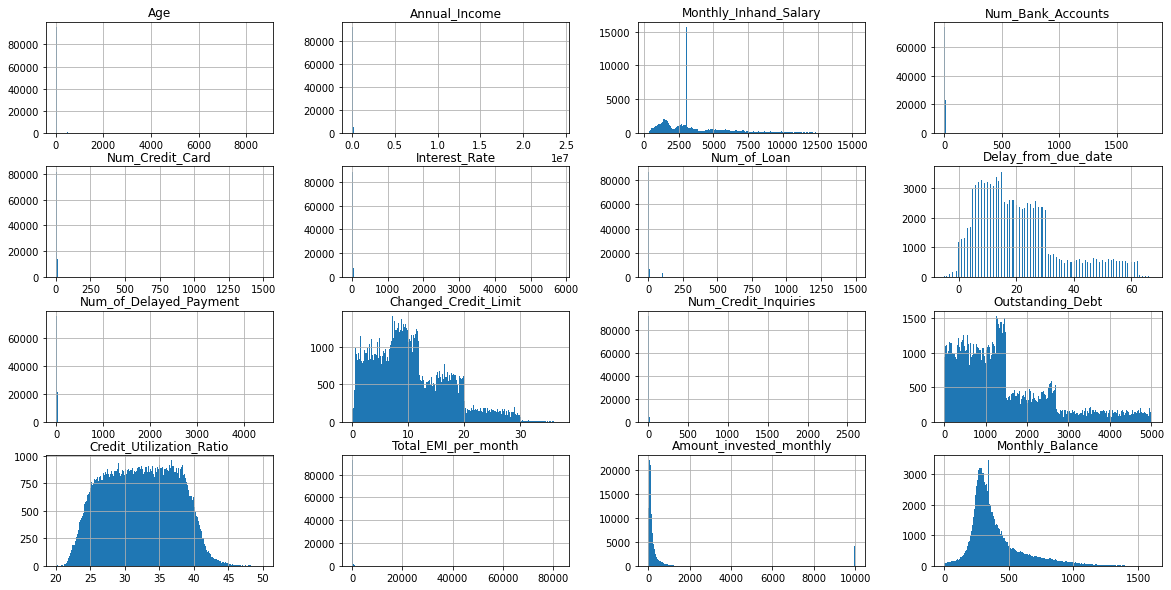

In [31]:
train_df.hist(bins=200,figsize=[20,10])

In [32]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

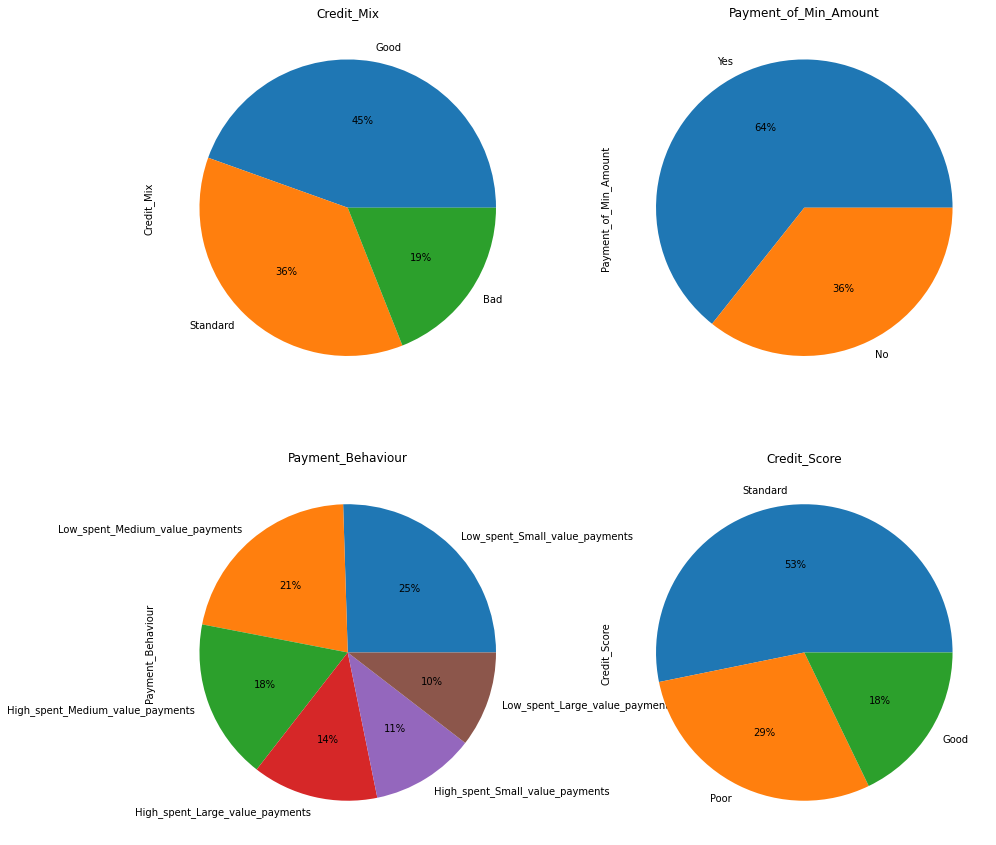

In [33]:
pie_plot(train_df, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

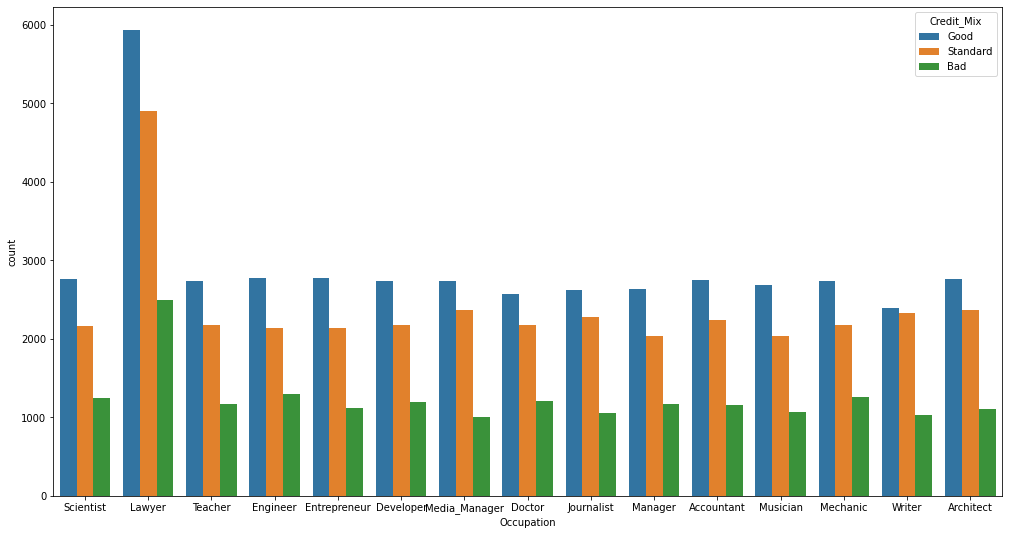

In [34]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=train_df,x="Occupation",hue="Credit_Mix")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

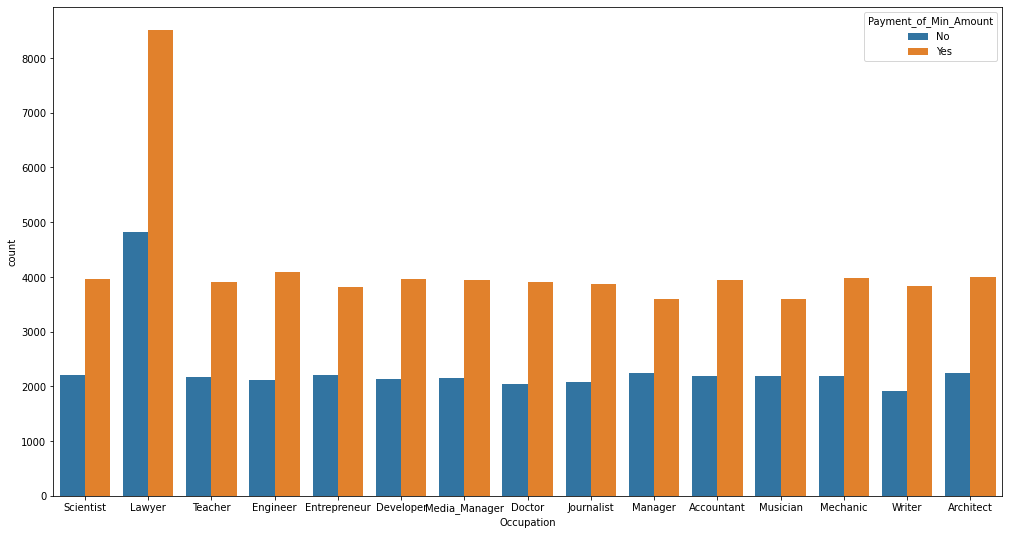

In [35]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=train_df,x="Occupation",hue="Payment_of_Min_Amount")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

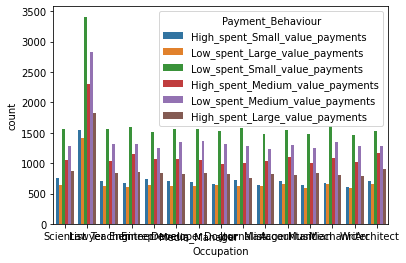

In [36]:
sns.countplot(data=train_df,x="Occupation",hue="Payment_Behaviour")

In [37]:
numeric_cols = train_df.select_dtypes(exclude = "object").columns
cat_cols = test_df.select_dtypes(include = "object").columns
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [38]:
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif_df = train_df[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,1.030038
1,Annual_Income,1.016180
2,Monthly_Inhand_Salary,4.749318
3,Num_Bank_Accounts,1.021308
4,Num_Credit_Card,1.029837
5,Interest_Rate,1.023873
6,Num_of_Loan,1.030466
7,Delay_from_due_date,4.437336
8,Num_of_Delayed_Payment,1.018731
9,Changed_Credit_Limit,4.289836


<AxesSubplot:>

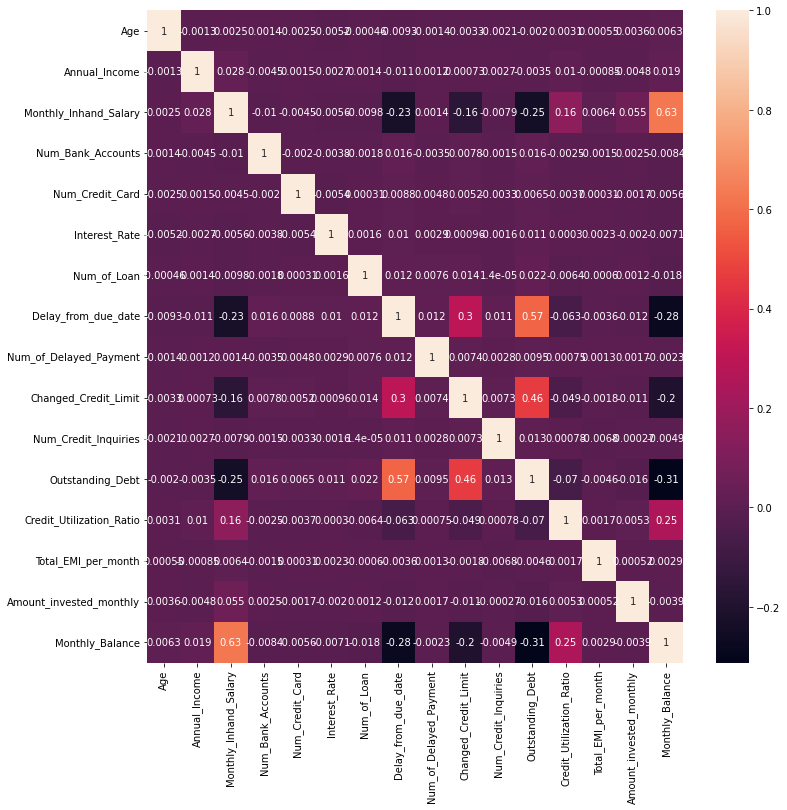

In [41]:
plt.figure(figsize= (12,12))
sns.heatmap(train_df[numeric_cols].corr(),annot=True)

In [42]:
def box_plot(train_df, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(train_df[l], palette="flare")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

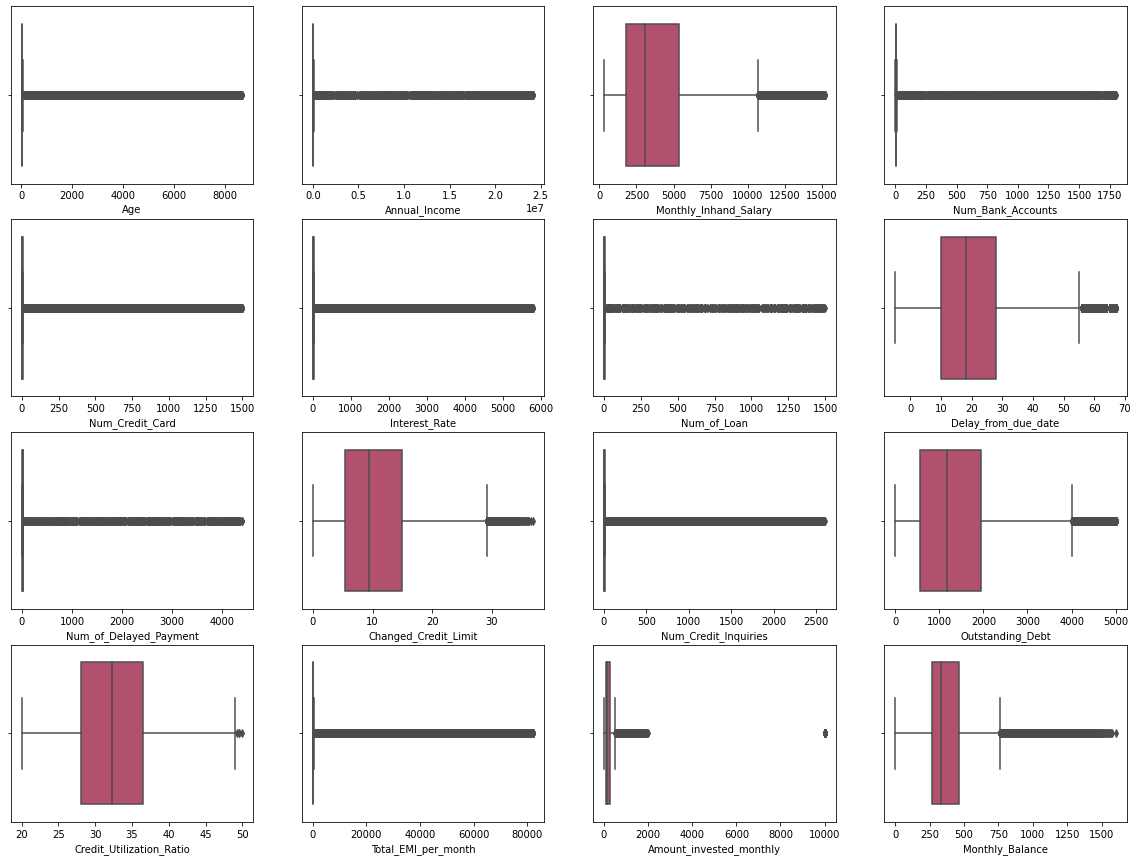

In [43]:
box_plot(train_df, numeric_cols)

In [44]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [45]:
train_df[numeric_cols] = RobustScaling(train_df[numeric_cols], numeric_cols)

In [46]:
train_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,...,-0.333333,Good,-0.258117,-0.648868,No,-0.150195,-0.311222,High_spent_Small_value_payments,-0.122904,Good
1,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,...,-0.333333,Good,-0.258117,-0.042096,No,-0.150195,-0.098445,Low_spent_Large_value_payments,-0.264738,Good
3,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,...,-0.333333,Good,-0.258117,-0.888774,No,-0.150195,-0.530350,Low_spent_Small_value_payments,0.024683,Good
4,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,...,-0.333333,Good,-0.258117,-0.596790,No,-0.150195,-0.412287,High_spent_Medium_value_payments,0.019542,Good
5,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,...,-0.333333,Good,-0.258117,-1.156456,No,-0.150195,0.239076,Low_spent_Medium_value_payments,-0.468666,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,High_spent_Large_value_payments,NaN,Poor
99996,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,High_spent_Medium_value_payments,NaN,Poor
99997,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,High_spent_Large_value_payments,NaN,Poor
99998,NaN,Mechanic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Good,NaN,NaN,No,NaN,NaN,Low_spent_Large_value_payments,NaN,Standard


In [47]:
train_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
train_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
train_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
train_df = pd.get_dummies(train_df, columns = ['Occupation', 'Payment_Behaviour'])

In [48]:
train_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196429,...,0,1,0,0,0,0,1,0,0,0
1,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,0.196429,...,0,1,0,0,0,0,0,1,0,0
3,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,0.196429,...,0,1,0,0,0,0,0,0,0,1
4,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,-0.013655,...,0,1,0,0,0,1,0,0,0,0
5,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,0.196429,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [49]:
for i in numeric_cols:
    train_df[i].fillna(method='ffill', inplace=True)

In [50]:
X = train_df.drop(['Credit_Score'],axis=1)
y = train_df['Credit_Score']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)


In [52]:
lr = LogisticRegression(n_jobs=-1,random_state=17,)

In [53]:
param = {'C': range(0,11)}

In [54]:
lr_greed = GridSearchCV(lr,param,cv=5)

In [55]:
lr_greed.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 55.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 431, in _process_worker
    r = call_item()
  File "/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "/opt/conda/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 595, in __call__
    return self.func(*arg

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=17),
             param_grid={'C': range(0, 11)})

In [56]:
lr_best = lr_greed.best_estimator_

In [57]:
lr_best.score(X_test,y_test)

0.5810505463212307

In [58]:
clf_rf = RandomForestClassifier(n_jobs=-1,random_state=17)

In [59]:
parametrs = {"n_estimators": [5,10,20,30], 'max_depth': range(1, 10)}


In [60]:
clf_rf_grid = GridSearchCV(clf_rf, parametrs, cv=5)

In [61]:
clf_rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': [5, 10, 20, 30]})

In [62]:
rf_best = clf_rf_grid.best_estimator_

In [63]:
rf_best.score(X_test,y_test)

0.5868387655925961